# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

u'C:\\Users\\lshu0\\Documents\\projects\\pydata-book'

## A brief matplotlib API primer

In [4]:
import matplotlib.pyplot as plt

### Figures and Subplots

In [5]:
fig = plt.figure()

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

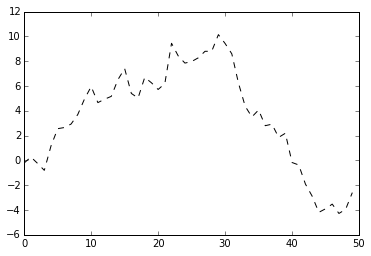

In [8]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

In [ ]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [ ]:
plt.close('all')

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [ ]:
plt.figure()

In [ ]:
plt.plot(randn(30).cumsum(), 'ko--')

In [ ]:
plt.close('all')

In [ ]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

In [ ]:
fig

In [ ]:
fig.savefig('figpath.svg')

In [ ]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [ ]:
plt.rc('figure', figsize=(10, 10))

## Plotting functions in pandas

### Line plots

In [ ]:
plt.close('all')

In [ ]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [ ]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [ ]:
plt.figure()

In [ ]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [ ]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot(kind='kde')

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [ ]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [ ]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [ ]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
data['CATEGORY'][:6]

In [ ]:
data.describe()

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [ ]:
dummy_frame.ix[:, :6].info()

In [ ]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [ ]:
data.ix[:, 10:15].info()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [ ]:
make_plot()

In [ ]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')